# Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts 
the number of wins for a given team in the 2015 season based on several different indicators of success. There are 
16 different features that will be used as the inputs to the machine learning and the output will be a value that 
represents the number of wins.

# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("All Libraries are loaded succesfully")

All Libraries are loaded succesfully


In [2]:
df = pd.read_csv("baseball.csv")
print("Baseball data loaded successfully")

Baseball data loaded successfully


In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Label Description

W- Number of wins (Target variable)

R- Runs

AB- At Bats

H- Hits

2B- Doubles

3B- Triples

HR- Homeruns

BB- Walks

SO- Strikeouts

SB- Stolen Bases

RA- Runs Allowed

ER- Earned Runs

ERA-Earned Run Average

CG- Complete Games

SHO-Shutouts

SV- Saves

E- Errors

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
#checking the shape 

df.shape

(30, 17)

It contains 30 rows and 17 columns.

# Exploratory data analysis

In [6]:
#checking the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.0 KB


we can observe all the features are integer data types except ERA

And, also there is no null values in dataset.

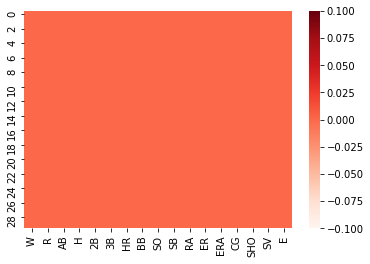

In [7]:
#checking null values using heatmap

sns.heatmap(df.isnull(),cmap='Reds')
plt.show()

It is clearly visible from the heatmap there is no null values in the dataset

In [8]:
#we can also check null values count-
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Univariate Anlaysis

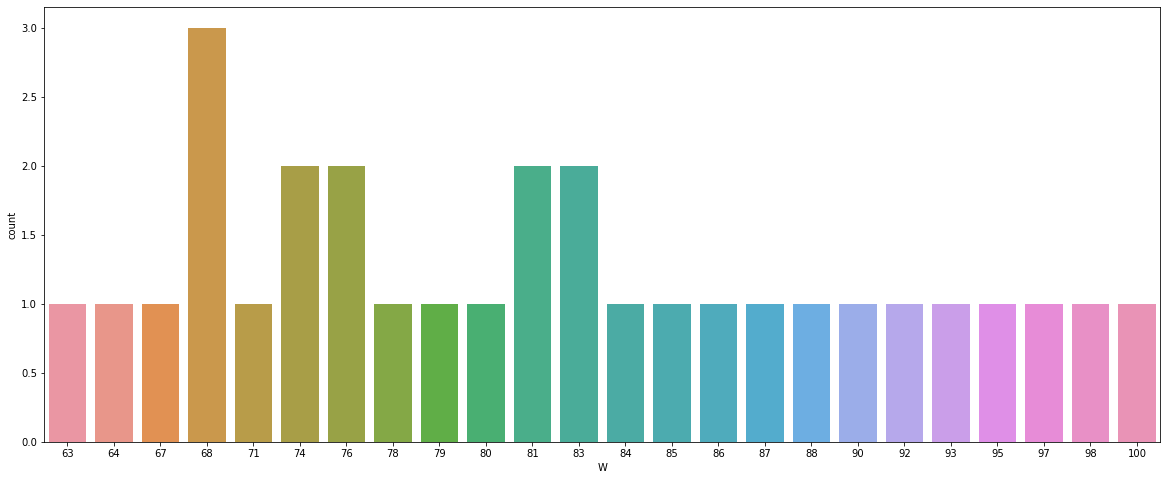

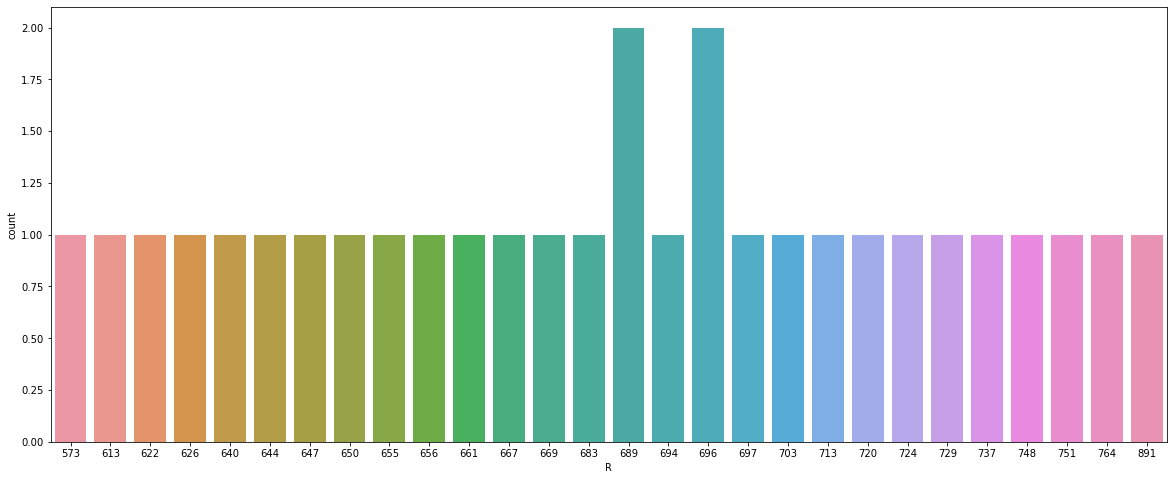

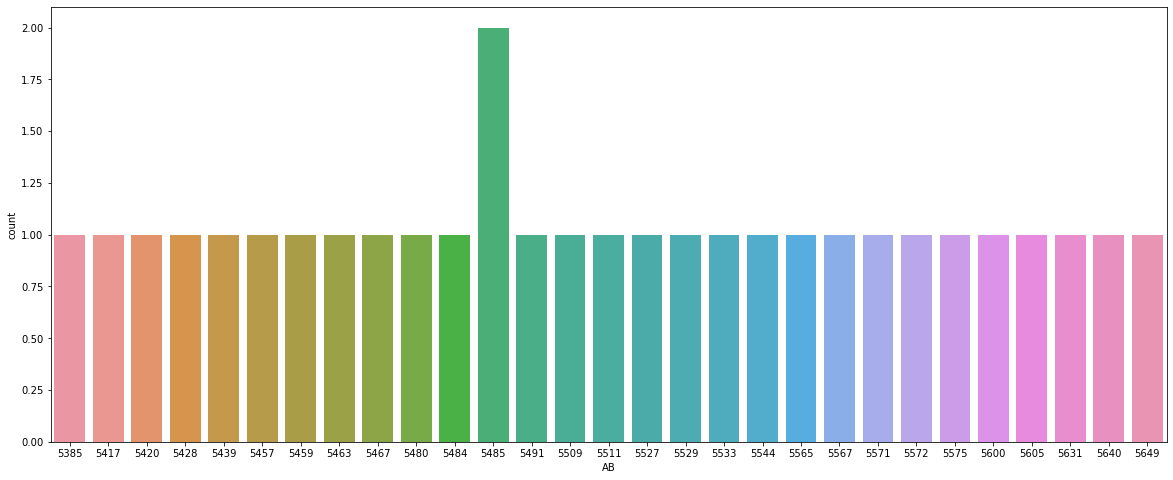

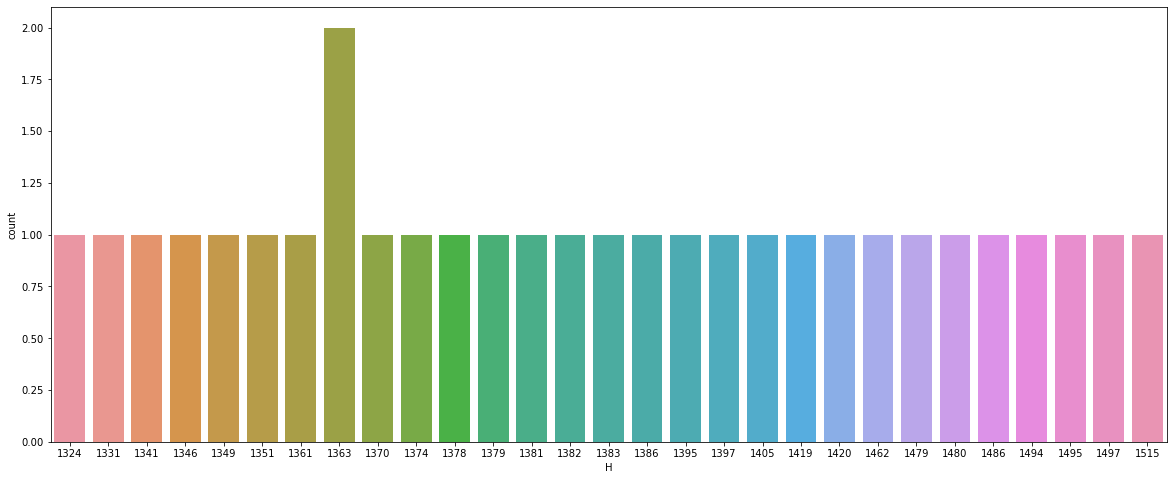

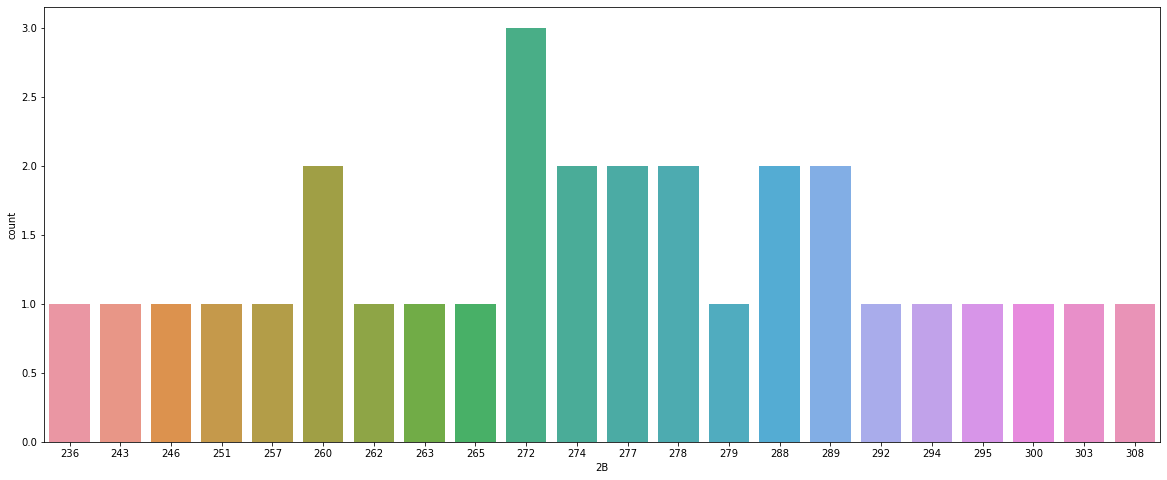

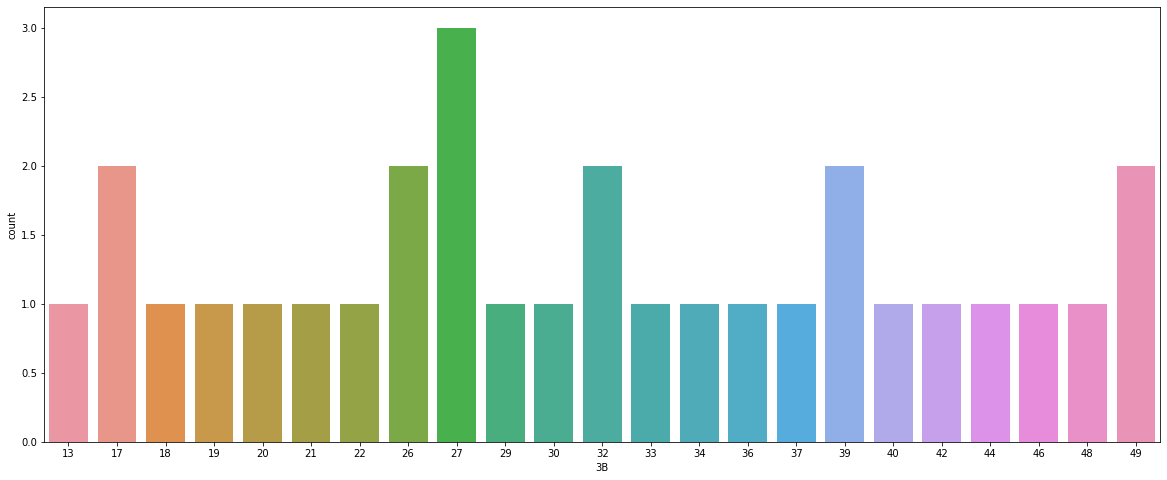

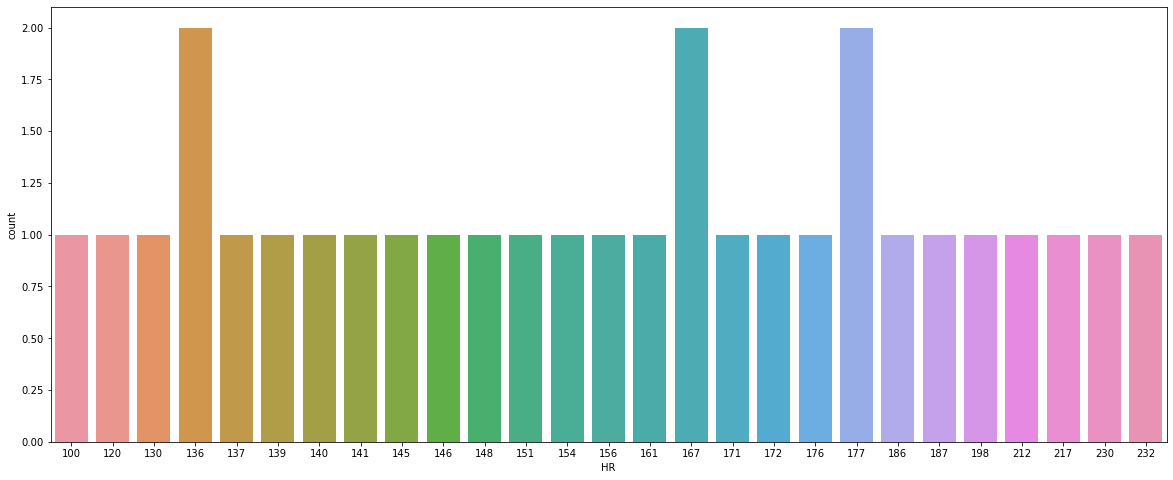

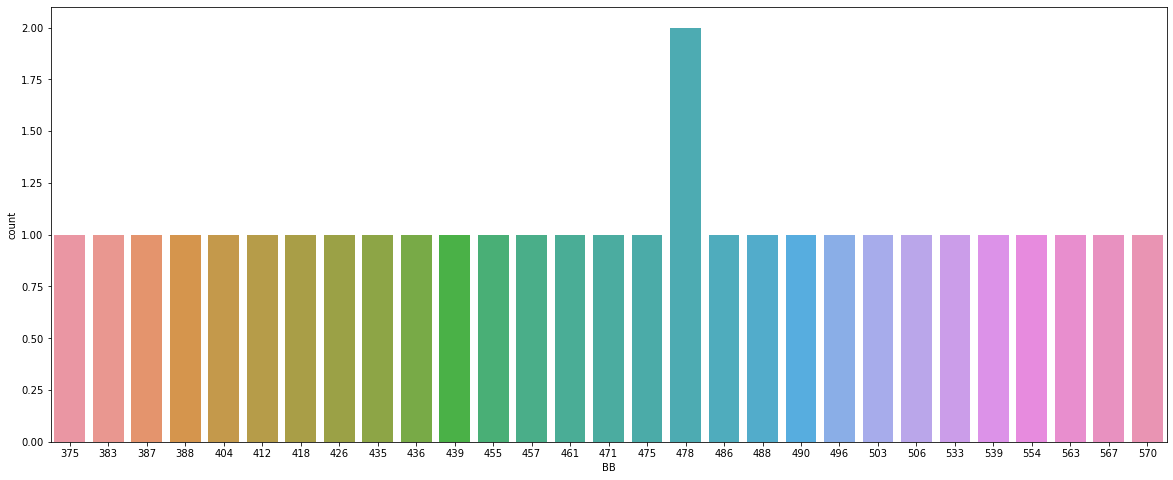

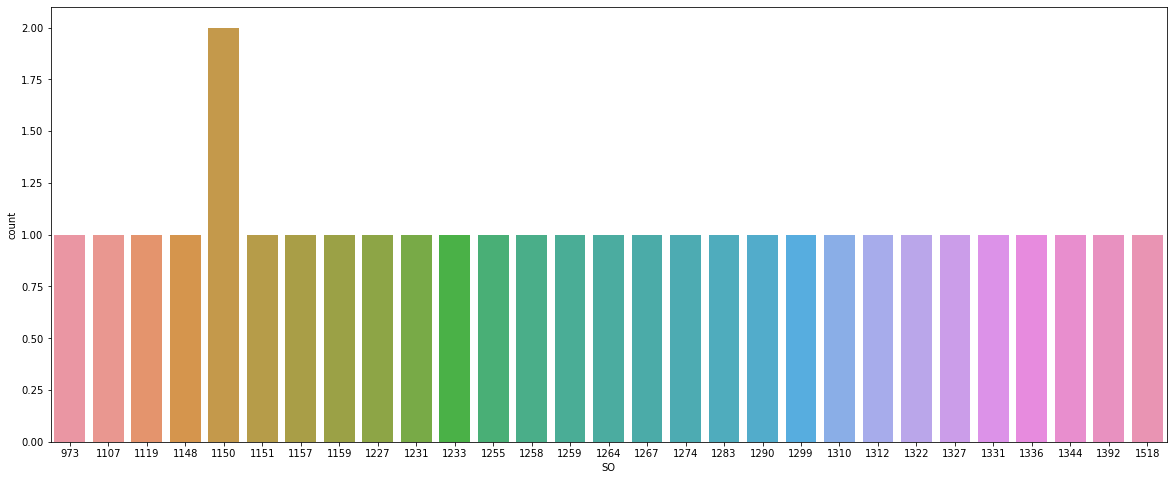

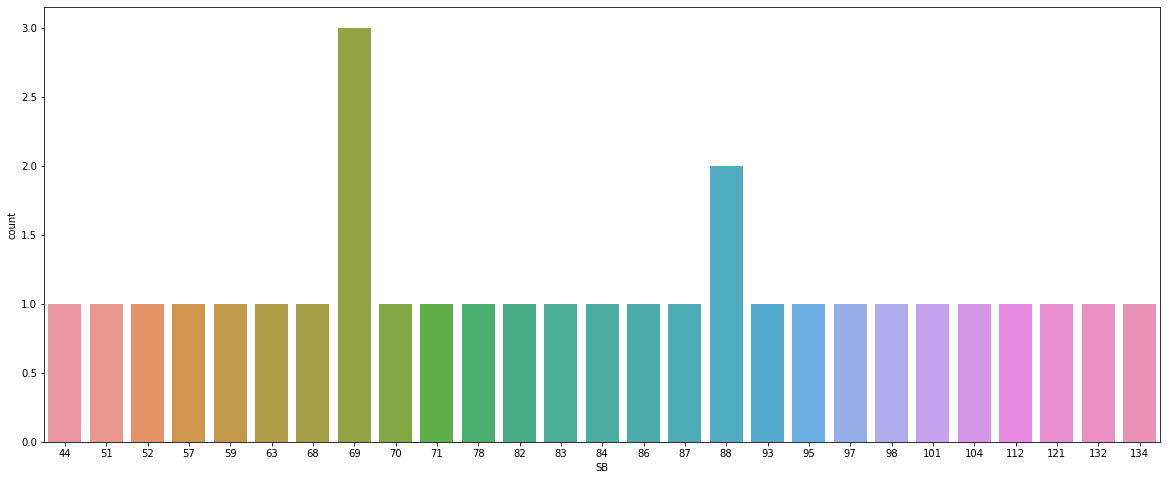

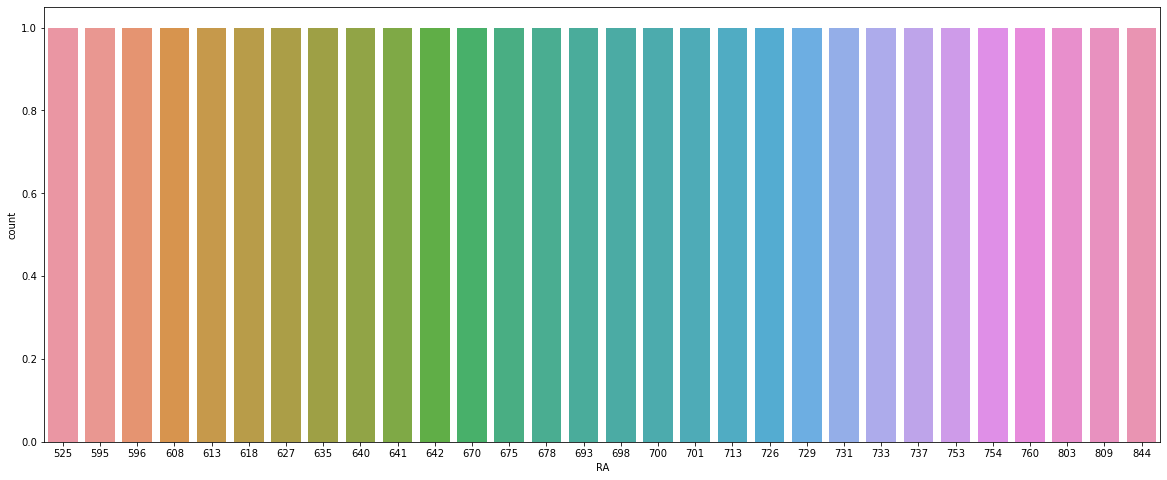

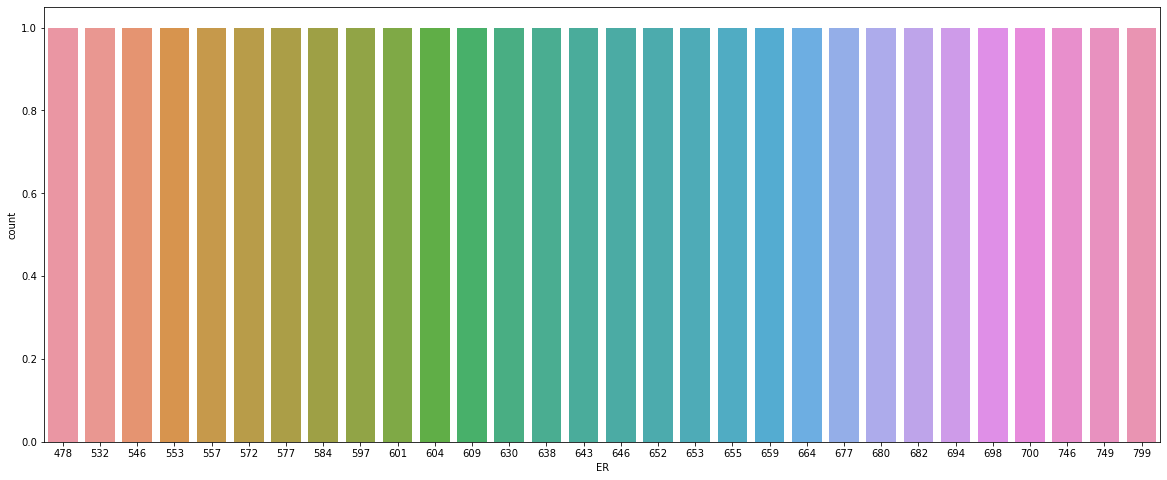

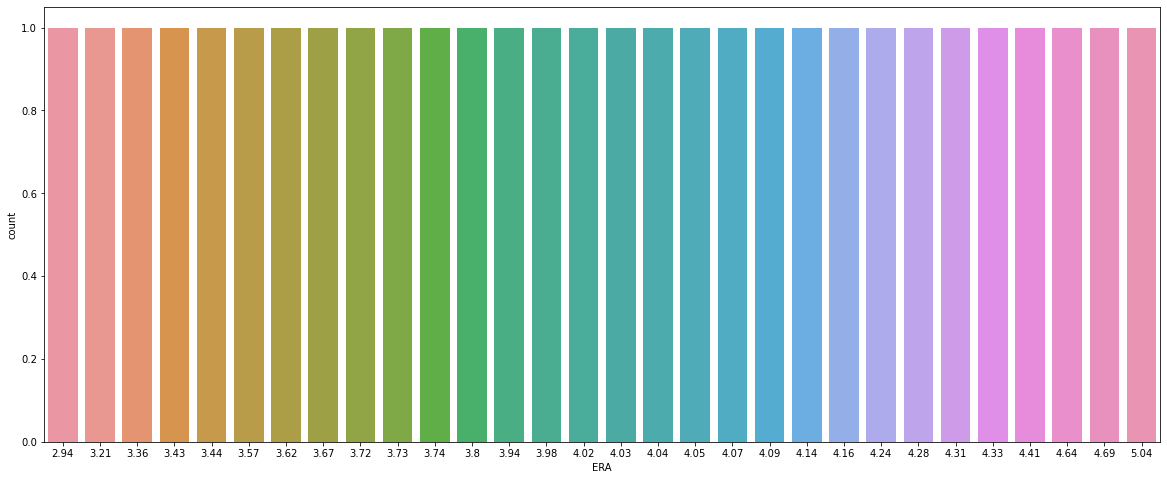

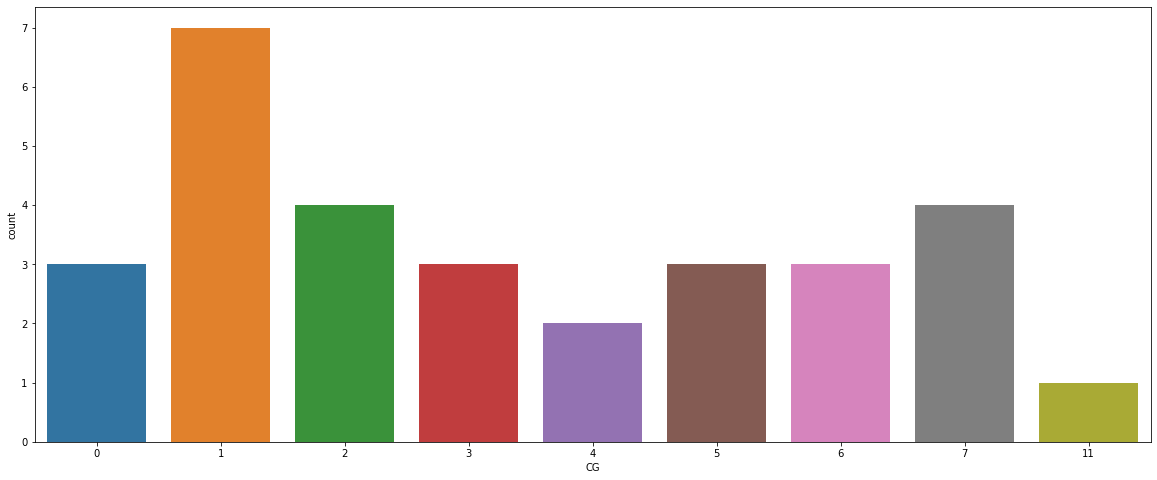

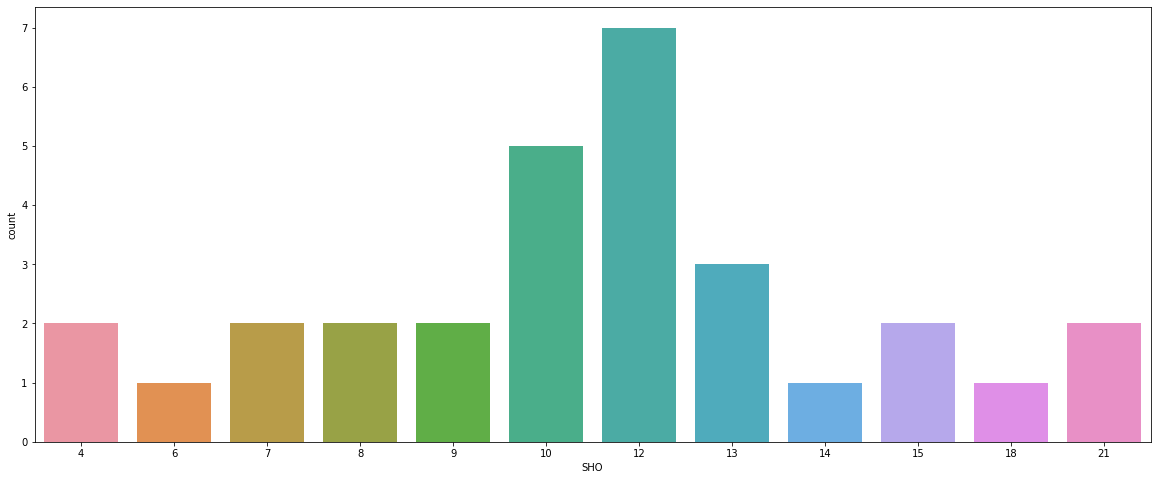

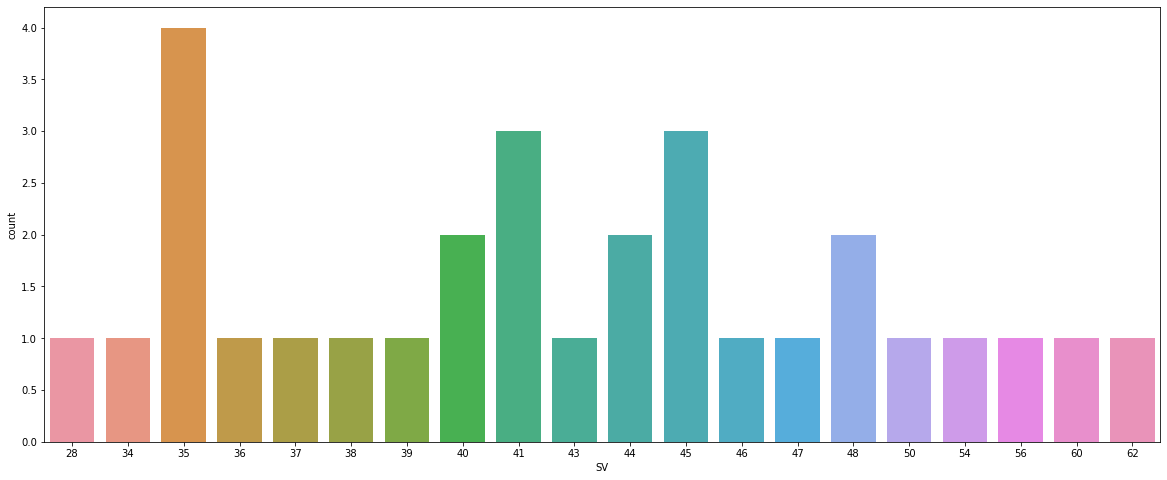

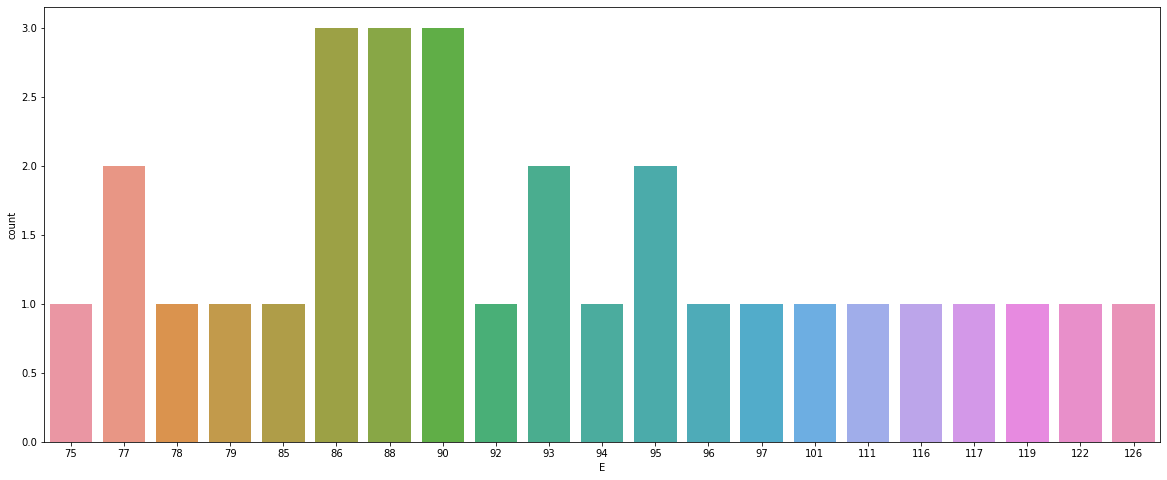

In [9]:
for i in df.columns:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df)
    plt.show()

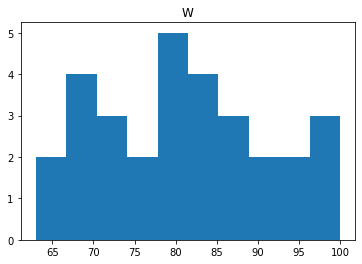

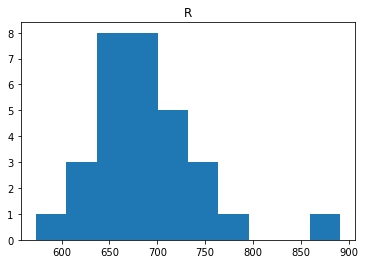

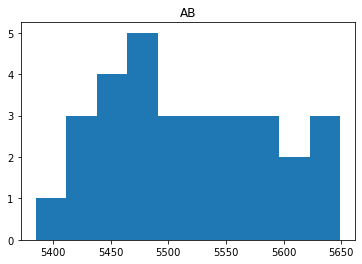

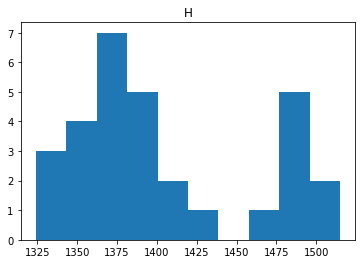

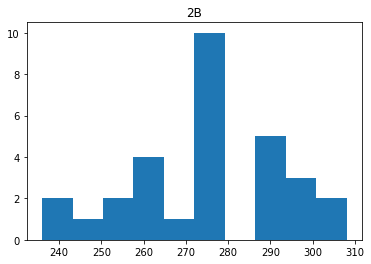

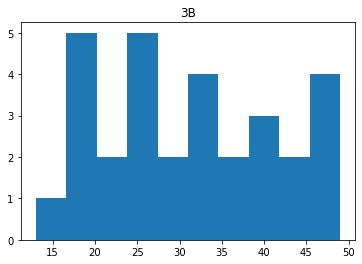

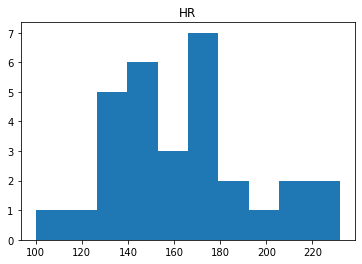

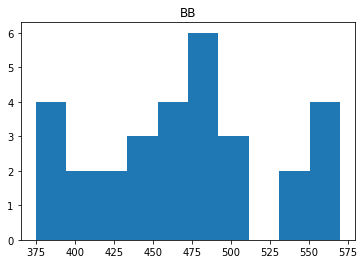

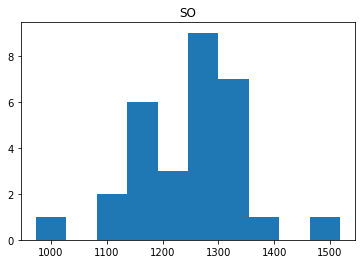

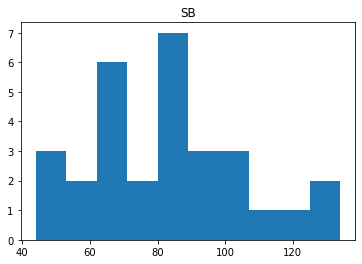

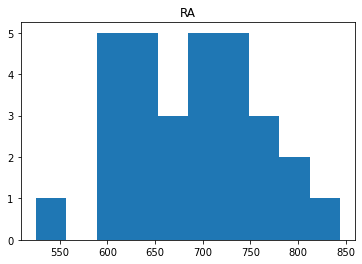

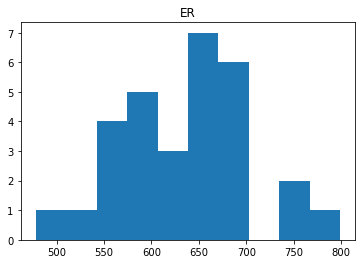

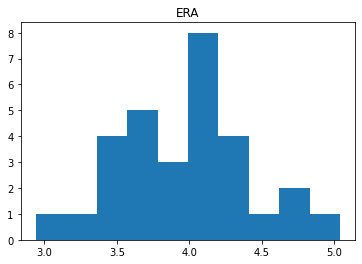

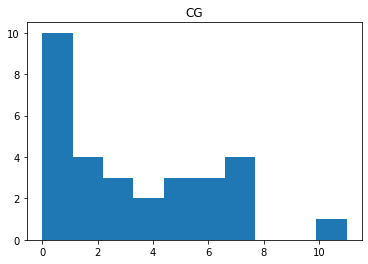

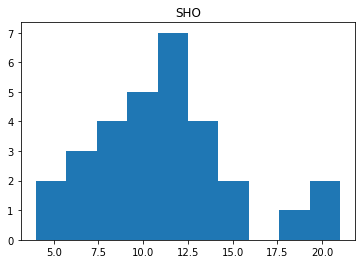

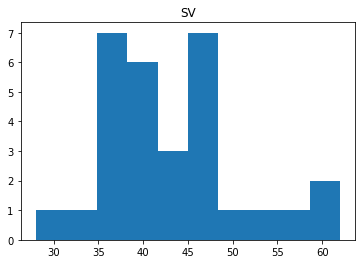

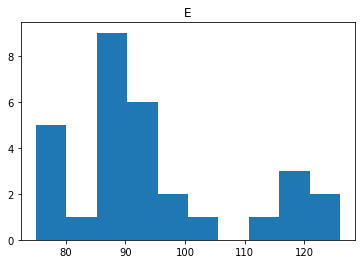

In [10]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

As, we can observe from the above plots that-

1)number of wins ranges from 63 to 100, and most number of wins at 68,74,76,81& 83.

2)runs ranges from 570 to 891.

3) At bats ranges from 5380 to 5650.

4)there is gap in between ranges in theese columns - R,H,2B,BB,SO,RA,ER,CG,SHO & E.


# Bivariate Analysis

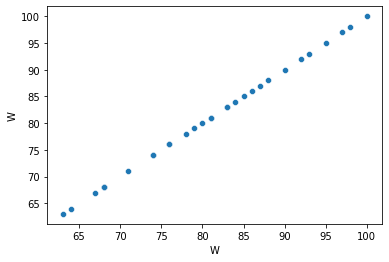

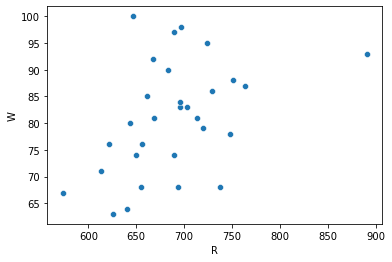

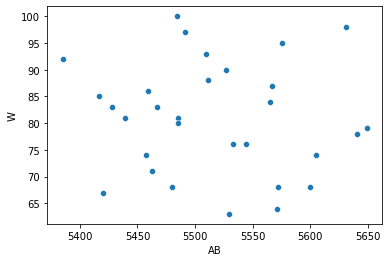

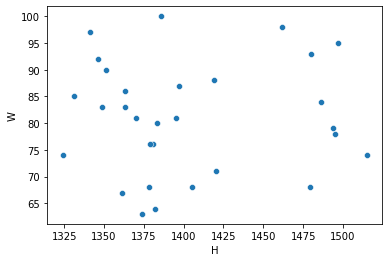

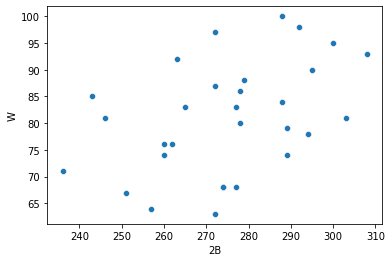

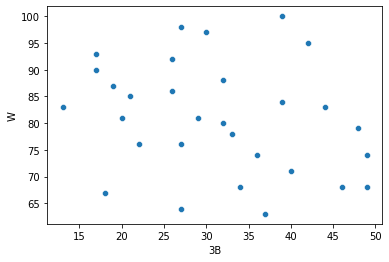

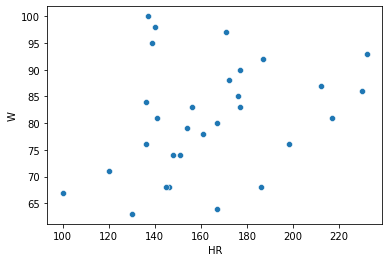

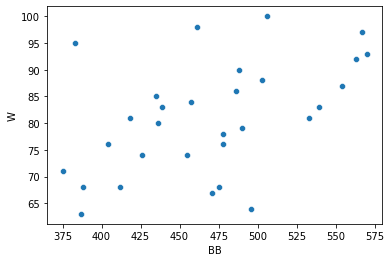

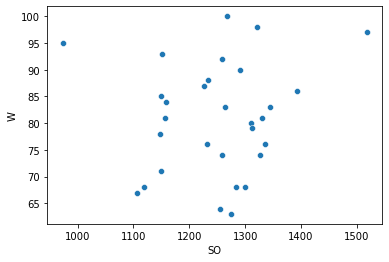

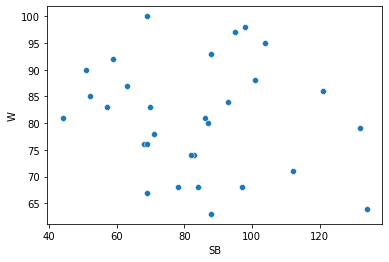

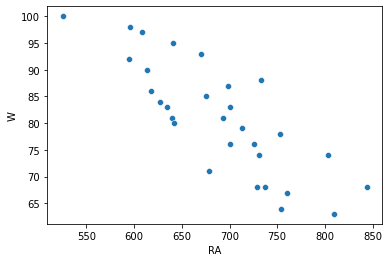

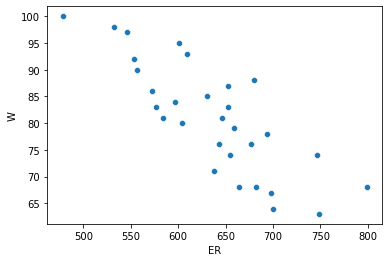

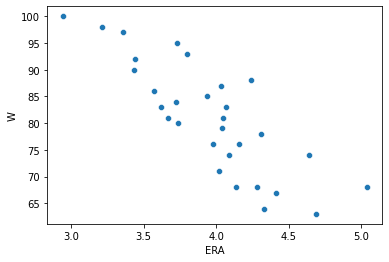

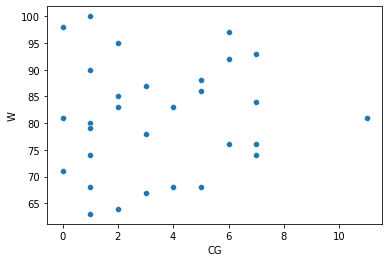

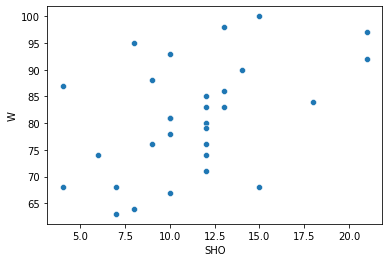

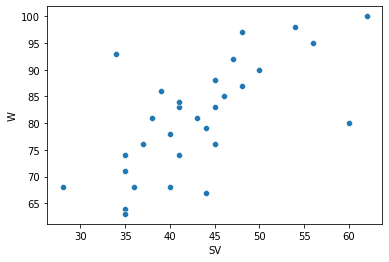

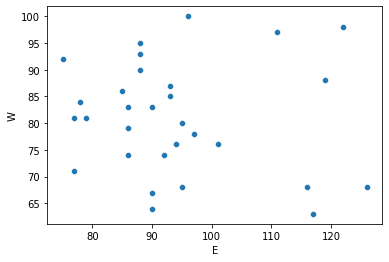

In [11]:
#Cheking  out the relation of features with target variables.
for i in df.columns:
    sns.scatterplot(x=df[i],y=df['W'])
    plt.show()

We can see that from the above plotting-

1)There is positive linear relation between W with R,SV,BB & SV.

2)There is a negative linear relation between W with RA, ER & ERA.

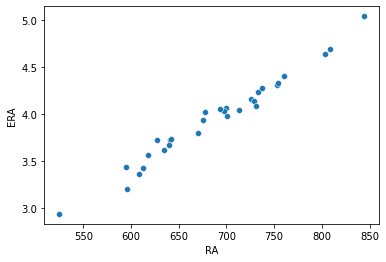

In [12]:
sns.scatterplot(x='RA',y='ERA',data=df)
plt.show()

<AxesSubplot:xlabel='ER', ylabel='ERA'>

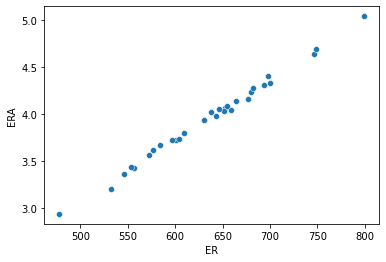

In [13]:
sns.scatterplot(x='ER',y='ERA',data=df)

<AxesSubplot:xlabel='RA', ylabel='ER'>

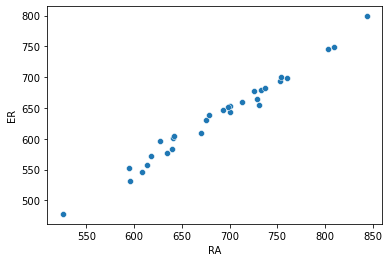

In [14]:
sns.scatterplot(x='RA',y='ER',data=df)

we can clearly see that there is  strong positive linear relaiton between them.

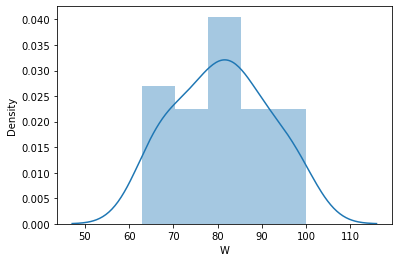

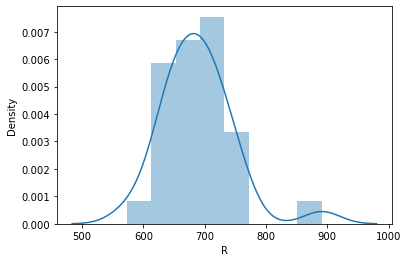

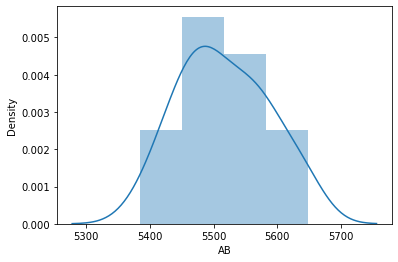

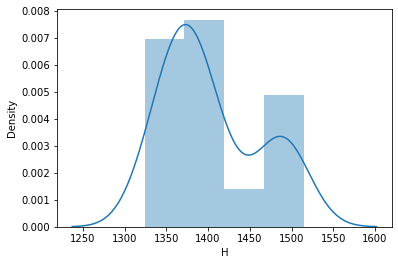

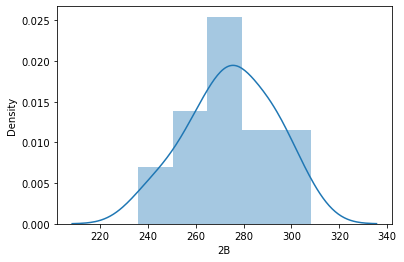

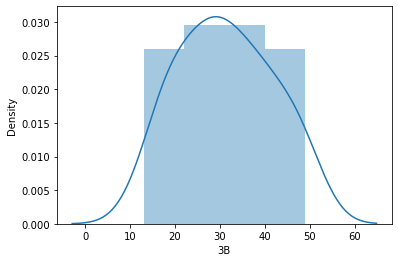

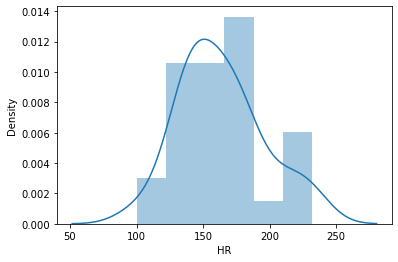

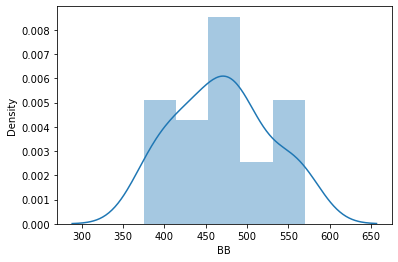

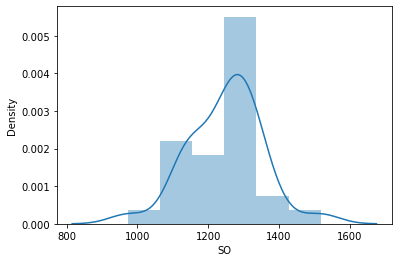

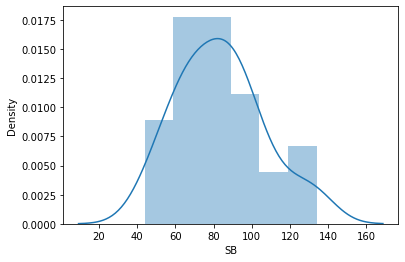

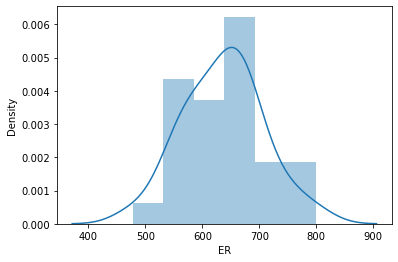

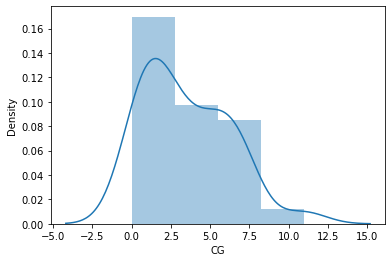

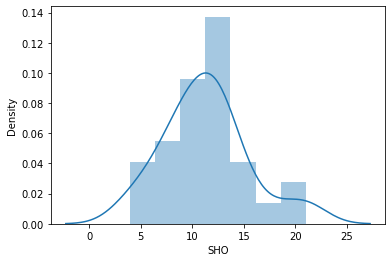

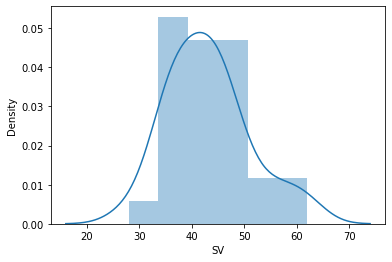

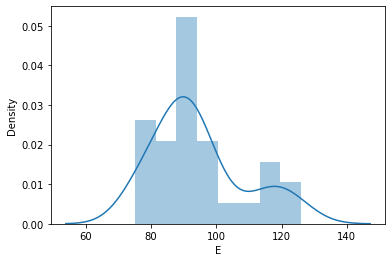

In [30]:
for i in df.columns:
    sns.distplot(df[i],kde=True)
    plt.show()

Most of the columns are having normal distribution, few columns have skewness we can observe that from the above plotting.

# Correlation

In [15]:
df.corr().T

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Lets correlate that using heatmap

<AxesSubplot:>

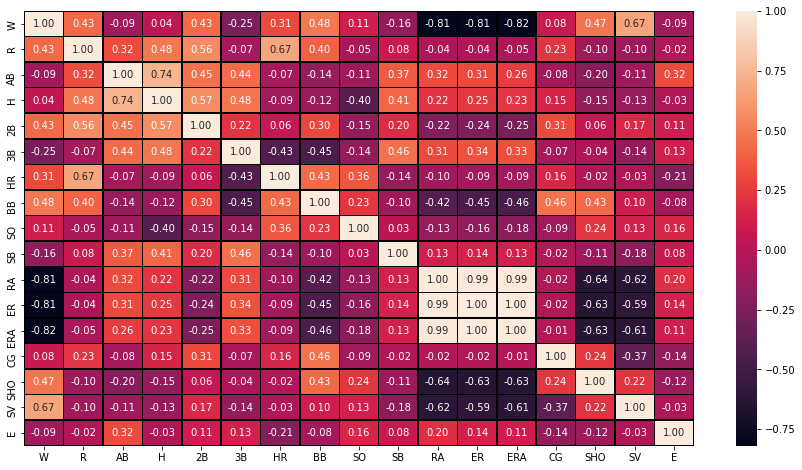

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

we can see observe from the above plotting-

1.R,H,2B,HR,BB,SO,CG,SHO &SV are having positive correlation with the target variable, i.e 'W'.


2.AB,3B,SB,RA,ER,ERA & E are having negative correlation with the target variable, i.e 'W'.

3.RA,ER & ERA are highly positive correlated with each other.

4.ER and ERA have 1 correlation with each other.

5.SV is having highest positive correlation with the target variable, i.e 'W'.

6.ERA is having highest negative correlation with the target variable, i.e 'W'.

In [17]:
df.drop(columns=['RA','ERA'],axis=1,inplace=True)

we are dropping here two columns i.e RA and ERA as ER and ERA are having same correlation i.e 1 dropping one with highest negative correlation with target variable and also RA is having very high negative correlation with target variable.

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.0,74.00,81.0,87.75,100.0
R,30.0,688.233333,58.761754,573.0,651.25,689.0,718.25,891.0
AB,30.0,5516.266667,70.467372,5385.0,5464.00,5510.0,5570.00,5649.0
H,30.0,1403.533333,57.140923,1324.0,1363.00,1382.5,1451.50,1515.0
2B,30.0,274.733333,18.095405,236.0,262.25,275.5,288.75,308.0
3B,30.0,31.300000,10.452355,13.0,23.00,31.0,39.00,49.0
HR,30.0,163.633333,31.823309,100.0,140.25,158.5,177.00,232.0
BB,30.0,469.100000,57.053725,375.0,428.25,473.0,501.25,570.0
SO,30.0,1248.200000,103.759470,973.0,1157.50,1261.5,1311.50,1518.0
SB,30.0,83.500000,22.815225,44.0,69.00,83.5,96.50,134.0


From this it is visible-

1) average number of wins is 81.
2) average of R is 688.
3) CG is having min 0 and max 11 with an average of 3.5

# Data cleaning

# Outlier checking

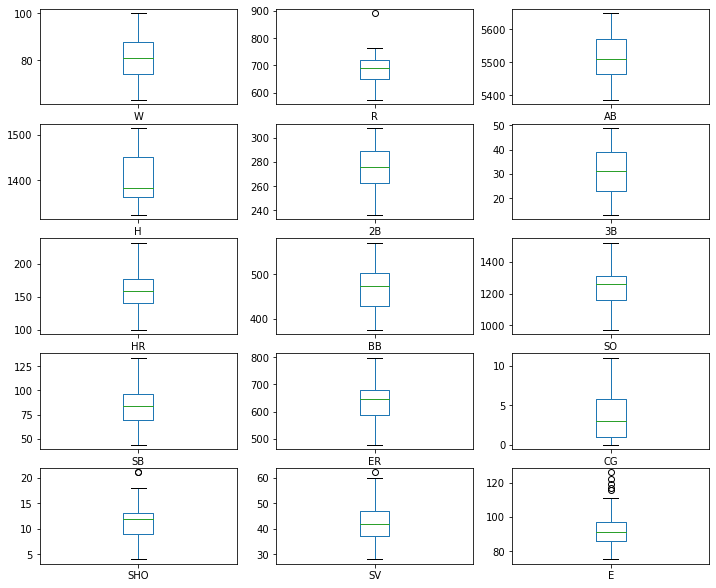

In [19]:
df.plot(kind='box',subplots=True,layout=(12,3),figsize=(12,25))
plt.show()

As, we can clearly observe there is not outliers present as such in datasets very few points in SV and E which is also very close from their max range.
Whereas,  R & SH is having one outlier only.

# Applying zscore

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(30, 15)

In [21]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int32), array([1], dtype=int32))


In [22]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 15)
(29, 15)


So we are not going to remove outliers as there is only outlier in the datasets.

In [23]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
ER     0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Now we are going to divide the feature columns and target.

In [24]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

# Checking skewness

In [25]:
x.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ER     0.058710
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# Handling skewness using yeojohnson method

In [26]:
from scipy.stats import yeojohnson
skw=['R','H','SV','E']
for i in skw:
    x[i]=np.log(x[i])
    print(x[i].skew())

0.7441956366104983
0.6285536261591038
0.15058249970623516
0.6300804690891397


In [27]:
x.skew()

R      0.744196
AB     0.183437
H      0.628554
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ER     0.058710
CG     0.736845
SHO    0.565790
SV     0.150582
E      0.630080
dtype: float64

# Standard Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=sc.fit_transform(x)
x=pd.DataFrame(k,columns = x.columns)

In [29]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ER,CG,SHO,SV,E
0,0.665385,0.847731,1.649371,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.505110,-0.539806,-0.814629,1.578599,-0.426629
1,0.179624,-0.711094,-0.981664,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.248930,-0.539806,0.172800,0.337972,-0.591448
2,-0.307662,-1.115233,-0.134198,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.751623,2.772641,-0.320914,-0.621200,-1.200122
3,-1.204801,0.241522,-0.389127,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.103922,1.300442,-0.567771,-0.772490,0.561190
4,0.055130,1.280738,1.951457,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.597501,1.300442,0.172800,-1.087738,-0.591448


In [33]:
x.shape,y.shape

((30, 14), (30,))

# Modelling

In [50]:
#models froms sickit learn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor

#ensemble technique
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

finding the best random state for modelling

In [40]:
LR=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print('At random state',i,'Training accuracy is:', r2_score(y_train,pred_train))
    print('At random state',i,'Testing accuracy is:',r2_score(y_test,pred_test))
    print('\n')

At random state 0 Training accuracy is: 0.9640179618005537
At random state 0 Testing accuracy is: 0.7263281349931089


At random state 1 Training accuracy is: 0.9780066449185695
At random state 1 Testing accuracy is: 0.5887507895629392


At random state 2 Training accuracy is: 0.9744710297823839
At random state 2 Testing accuracy is: -0.058061559186391776


At random state 3 Training accuracy is: 0.9739998359307792
At random state 3 Testing accuracy is: 0.6980956637672897


At random state 4 Training accuracy is: 0.9478538008107541
At random state 4 Testing accuracy is: 0.7653984834695522


At random state 5 Training accuracy is: 0.9510413769440664
At random state 5 Testing accuracy is: 0.8659379669588928


At random state 6 Training accuracy is: 0.92846270561503
At random state 6 Testing accuracy is: 0.8849709043018295


At random state 7 Training accuracy is: 0.9435033586737446
At random state 7 Testing accuracy is: 0.8991915601412526


At random state 8 Training accuracy is: 0.98320

We are getting best result at 36 & 39. So our random state will be 36 or 39.

In [36]:
#we are splitting data at random satate 36
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=36)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((21, 14), (9, 14), (21,), (9,))

Different models for modelling-

In [46]:
LS=Lasso()
RD=Ridge()
KNN=KNeighborsRegressor()
RF=RandomForestRegressor()
ADA=AdaBoostRegressor()

In [47]:
model=[LR,LS,RD,KNN,RF,ADA]

In [56]:
for i in model:
    print('\n')
    print('******************',i,'*******************')
    print('\n')
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    pred_t=i.predict(x_train)
    score=i.score(x_train,y_train)
    print('score:',score)
    print('mean absolute error:',mean_absolute_error(y_test,pred))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))
    print('Testing r2_score:',r2_score(y_test,pred))
    print('Training r2_score:',r2_score(y_train,pred_t))
    cvs=cross_val_score(i, x, y, cv=4)
    print('Cross Validation Score:',cvs.mean())



****************** LinearRegression() *******************


score: 0.9556421491312094
mean absolute error: 4.688240786234163
Root mean squared error: 5.091248140201262
Testing r2_score: 0.8084669387307675
Training r2_score: 0.9556421491312094
Cross Validation Score: 0.6739675388420907


****************** Lasso() *******************


score: 0.882333964457415
mean absolute error: 3.365412173733484
Root mean squared error: 3.7317583062909376
Testing r2_score: 0.8970983739662212
Training r2_score: 0.882333964457415
Cross Validation Score: 0.8154407501202553


****************** Ridge() *******************


score: 0.9442496879837896
mean absolute error: 4.361861439650107
Root mean squared error: 4.8872652345690275
Testing r2_score: 0.8235071812337903
Training r2_score: 0.9442496879837896
Cross Validation Score: 0.761809208786864


****************** KNeighborsRegressor() *******************


score: 0.6408629012192087
mean absolute error: 7.777777777777778
Root mean squared error: 8.91

From the above observations, we can see that-

Lasso is giving the best results with testing r2 score- 90% , training r2 score- 88%, RMSE- 3.4 and MAE-3.7

# Hyper parameter tuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [90]:
parameters={'alpha':[0.0001, 0.001, 0.01, 0.1,1]}
gcv=GridSearchCV(ls,parameters,cv=4)

In [91]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1]})

In [92]:
#checking the best parameters
gcv.best_params_

{'alpha': 1}

In [93]:
predgcv=gcv.best_estimator_.predict(x_test)

In [97]:
print('Mean absolute error:',mean_absolute_error(y_test,predgcv))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predgcv)))
print('r2_score:',r2_score(y_test,predgcv))

Mean absolute error: 3.365412173733484
Root mean squared error: 3.7317583062909376
r2_score: 0.8970983739662212


# Our best model Lasso is with r2_score of 90%, MAE of 3.3 and RMSE of 3.7 and we can't find much difference after hyper tunning also.

# MOdel Saving-

In [3]:
#import joblib
#joblib.dump(r2_mod,"Finalmodel.pkl")